# CWordTM Toolkit Usage on the Holy Bible (CUV)

This Jupyter notebook demonstrates how to use the package "CWordTM" on the Holy Bible (Chinese Union Version - Traditional Chinese):

1. Utility Features
1. Text Visualization - Word Cloud
1. Text Summarization
1. Pivot Table
1. OT Quotes
1. Topic Modeling - LDA, BERTopic and NMF

### CWordTM Toolkit's Documentation: https://cwordtm.readthedocs.io

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Package CWordTM
import cwordtm
from cwordtm import *

In [3]:
cwordtm.__version__

'0.6.4'

## 1. Utility Features

In [4]:
# Load the whole Bible (Chinese Union Version)
bible = "cuv.csv"
cdf = util.load_word(bible, info=True)

Loading file 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\cuv.csv' ...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31102 entries, 0 to 31101
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book       31102 non-null  object
 1   book_no    31102 non-null  int64 
 2   chapter    31102 non-null  int64 
 3   verse      31102 non-null  int64 
 4   text       31102 non-null  object
 5   testament  31102 non-null  int64 
 6   category   31102 non-null  object
 7   cat        31102 non-null  object
 8   cat_no     31102 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.1+ MB


### Extract Partial Scripture

In [5]:
# Extract OT Scripture
otdf = util.extract(cdf, testament=0)
otdf.head()

book  book_no  chapter  verse                        text  testament  \
0  Gen        1        1      1                   起初　神創造天地。          0   
1  Gen        1        1      2     地是空虛混沌．淵面黑暗．　神的靈運行在水面上。          0   
2  Gen        1        1      3               　神說、要有光、就有了光。          0   
3  Gen        1        1      4            　神看光是好的、就把光暗分開了。          0   
4  Gen        1        1      5  　神稱光為晝、稱暗為夜．有晚上、有早晨、這是頭一日。          0   

  category  cat  cat_no  
0    Torah  tor       0  
1    Torah  tor       0  
2    Torah  tor       0  
3    Torah  tor       0  
4    Torah  tor       0

In [6]:
# Extract Gospels (The first four book in NT)
gos = util.extract(cdf, category='gos')
gos.head()

book  book_no  chapter  verse                                  text  \
23145  Mat       40        1      1  亞伯拉罕的後裔、大衛的子孫、耶穌基督的家譜．〔後裔子孫原文都作兒子下同〕   
23146  Mat       40        1      2             亞伯拉罕生以撒．以撒生雅各．雅各生猶大和他的弟兄．   
23147  Mat       40        1      3         猶大從他瑪氏生法勒斯和謝拉．法勒斯生希斯崙．希斯崙生亞蘭．   
23148  Mat       40        1      4                亞蘭生亞米拿達．亞米拿達生拿順．拿順生撒門．   
23149  Mat       40        1      5        撒門從喇合氏生波阿斯．波阿斯從路得氏生俄備得．俄備得生耶西．   

       testament category  cat  cat_no  
23145          1   Gospel  gos       5  
23146          1   Gospel  gos       5  
23147          1   Gospel  gos       5  
23148          1   Gospel  gos       5  
23149          1   Gospel  gos       5

In [7]:
# Extract the Book of Romans
rom = util.extract(cdf, book='Rom')
rom.head()

book  book_no  chapter  verse                              text  \
27930  Rom       45        1      1         耶穌基督的僕人保羅、奉召為使徒、特派傳　神的福音．   
27931  Rom       45        1      2            這福音是　神從前藉眾先知、在聖經上所應許的、   
27932  Rom       45        1      3        論到他兒子我主耶穌基督．按肉體說、是從大衛後裔生的、   
27933  Rom       45        1      4        按聖善的靈說、因從死裡復活、以大能顯明是　神的兒子。   
27934  Rom       45        1      5  我們從他受了恩惠、並使徒的職分、在萬國之中叫人為他的名信服真道．   

       testament          category  cat  cat_no  
27930          1  Pauline Epistles  pau       7  
27931          1  Pauline Epistles  pau       7  
27932          1  Pauline Epistles  pau       7  
27933          1  Pauline Epistles  pau       7  
27934          1  Pauline Epistles  pau       7

In [8]:
# Extract Verse 28 of Chapter 8 of Romans
rom8_28 = util.extract(cdf, book='Rom', chapter=8, verse=28)
rom8_28.text

28143    我們曉得萬事都互相效力、叫愛　神的人得益處、就是按他旨意被召的人。
Name: text, dtype: object

In [9]:
# Another way to extract Rom 8:28
rom8_28 = util.extract2(cdf, filter='Rom 8:28')
rom8_28.text

28143    我們曉得萬事都互相效力、叫愛　神的人得益處、就是按他旨意被召的人。
Name: text, dtype: object

In [10]:
# Extract Rom 8:1~10
rom8_1_10 = util.extract2(cdf, filter='Rom 8:1-10')
list(rom8_1_10.text)

['如今那些在基督耶穌裡的、就不定罪了。',
 '因為賜生命聖靈的律、在基督耶穌裡釋放了我、使我脫離罪和死的律了。',
 '律法既因肉體軟弱、有所不能行的、\u3000神就差遣自己的兒子、成為罪身的形狀、作了贖罪祭、在肉體中定了罪案．',
 '使律法的義、成就在我們這不隨從肉體、只隨從聖靈的人身上。',
 '因為隨從肉體的人、體貼肉體的事．隨從聖靈的人、體貼聖靈的事。',
 '體貼肉體的就是死．體貼聖靈的乃是生命平安．',
 '原來體貼肉體的、就是與\u3000神為仇．因為不服\u3000神的律法、也是不能服。',
 '而且屬肉體的人、不能得\u3000神的喜歡。',
 '如果\u3000神的靈住在你們心裡、你們就不屬肉體、乃屬聖靈了．人若沒有基督的靈、就不是屬基督的。',
 '基督若在你們心裡、身體就因罪而死、心靈卻因義而活．']

## 2. Text Visualization -  Word Cloud

In [11]:
# Extract the NT Scripture for Word Cloud
text_list = util.get_text_list(cdf[cdf.testament==1])   # load New Testament Scripture
text_list[:10]

['亞伯拉罕的後裔、大衛的子孫、耶穌基督的家譜．〔後裔子孫原文都作兒子下同〕',
 '亞伯拉罕生以撒．以撒生雅各．雅各生猶大和他的弟兄．',
 '猶大從他瑪氏生法勒斯和謝拉．法勒斯生希斯崙．希斯崙生亞蘭．',
 '亞蘭生亞米拿達．亞米拿達生拿順．拿順生撒門．',
 '撒門從喇合氏生波阿斯．波阿斯從路得氏生俄備得．俄備得生耶西．',
 '耶西生大衛王。大衛從烏利亞的妻子生所羅門．',
 '所羅門生羅波安．羅波安生亞比雅．亞比雅生亞撒．',
 '亞撒生約沙法．約沙法生約蘭．約蘭生烏西亞．',
 '烏西亞生約坦．約坦生亞哈斯．亞哈斯生希西家．',
 '希西家生瑪拿西．瑪拿西生亞們．亞們生約西亞．']

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\johnnyc\AppData\Local\Temp\jieba.cache


Loading Chinese vocabulary 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\bible_vocab.txt' ...


Loading model cost 0.570 seconds.
Prefix dict has been built successfully.
Building prefix dict from D:\Dev\Anaconda3\lib\site-packages\cwordtm\dictionary\dict.txt.big.txt ...
Dumping model to file cache C:\Users\johnnyc\AppData\Local\Temp\jieba.u819f581d122236472c15f14136fc73d9.cache
Loading model cost 1.170 seconds.
Prefix dict has been built successfully.
D:\Dev\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


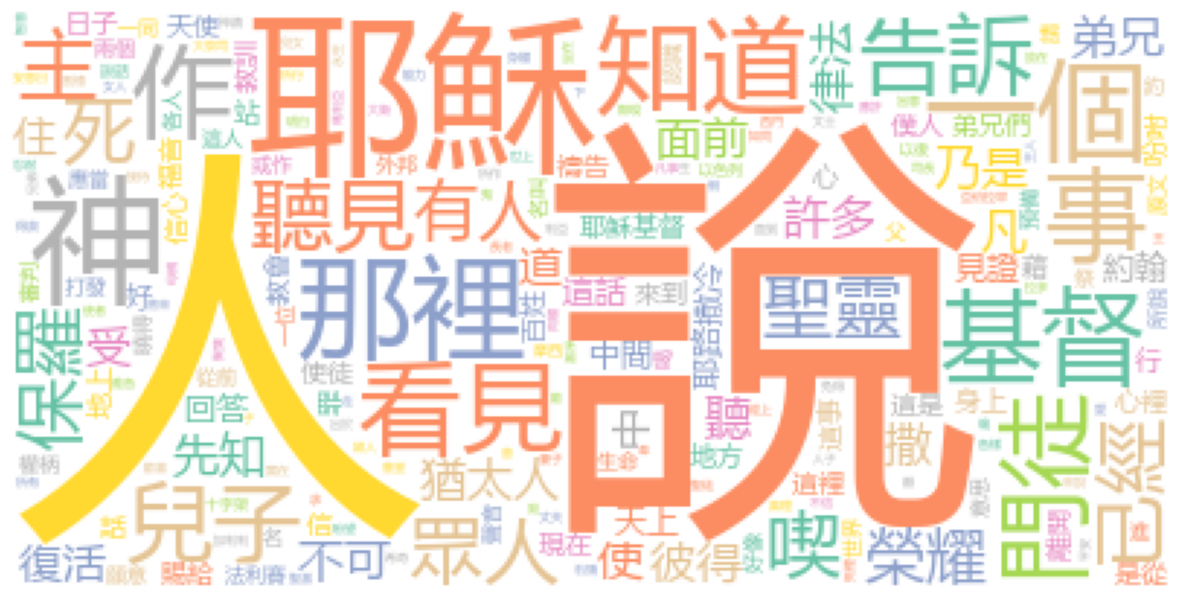

In [12]:
# White background with no image mask
viz.chi_wordcloud(text_list)

Building prefix dict from D:\Dev\Anaconda3\lib\site-packages\cwordtm\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\johnnyc\AppData\Local\Temp\jieba.u819f581d122236472c15f14136fc73d9.cache


Loading Chinese vocabulary 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\bible_vocab.txt' ...


Loading model cost 0.915 seconds.
Prefix dict has been built successfully.
D:\Dev\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


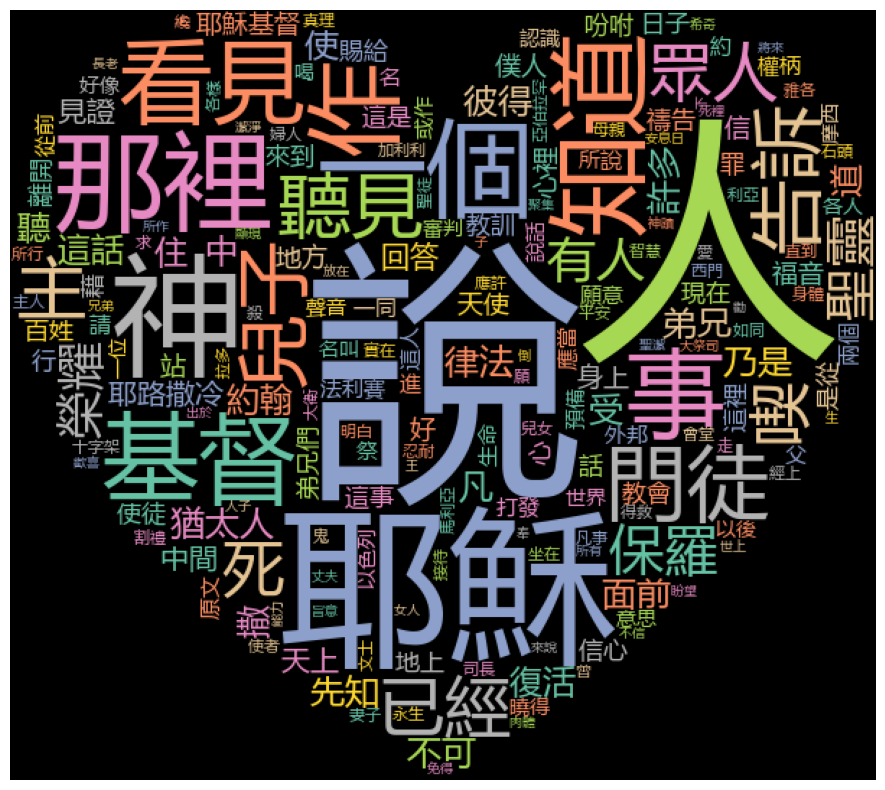

In [13]:
# Use internal image mask
viz.chi_wordcloud(text_list, bg='black', image=1)

## 3. Text Summarization

In [14]:
# Extract and summarize Chapter 8 of Romans
rom8 = util.extract2(cdf, 'Rom 8')
ta.summary_chi(rom8)

Building prefix dict from D:\Dev\Anaconda3\lib\site-packages\cwordtm\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\johnnyc\AppData\Local\Temp\jieba.u819f581d122236472c15f14136fc73d9.cache


Loading Chinese vocabulary 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\bible_vocab.txt' ...


Loading model cost 0.917 seconds.
Prefix dict has been built successfully.


['因為隨從肉體的人、體貼肉體的事．隨從聖靈的人、體貼聖靈的事',
 '而且屬肉體的人、不能得神的喜歡',
 '如果神的靈住在你們心裡、你們就不屬肉體、乃屬聖靈了．人若沒有基督的靈、就不是屬基督的']

## 4. Pivot Table

### Show Bible Scripture Statistics through a Pivot Table

In [15]:
util.set_rows()
pivot.stat(cdf, chi=True)

Book category information can be shown by invoking 'util.bible_cat_info()'


chapter  verse     text
category         book_no book                         
Torah            1       Gen        50   1533    51460
                 2       Exo        40   1213    40057
                 3       Lev        27    859    29228
                 4       Num        36   1288    41654
                 5       Deu        34    959    35904
Sub-Total                          187   5852   198303
OT History       6       Jos        24    658    25794
                 7       Jug        21    618    24375
                 8       Rut         4     85     3362
                 9       1Sa        31    810    32218
                 10      2Sa        24    695    26697
                 11      1Ki        22    816    30530
                 12      2Ki        25    719    29626
                 13      1Ch        29    942    30231
                 14      2Ch        36    822    33445
                 15      Ezr        10    280    10094
                 16      Neh        13    406    14739
                 17      Est        10    167     6571
Sub-Total                          249   7018   267682
Ketuvim          18      Job        42   1070    24294
                 19      Psm       150   2461    64303
                 20      Pro        31    915    19986
                 21      Ecc        12    222     7228
                 22      Son         8    117     3979
Sub-Total                          243   4785   119790
Major Prophets   23      Isa        66   1292    50630
                 24      Jer        52   1364    58005
                 25      Lam         5    154     4721
                 26      Eze        48   1273    49218
                 27      Dan        12    357    14646
Sub-Total                          183   4440   177220
Minor Prophets   28      Hos        14    197     7455
                 29      Joe         3     73     2642
                 30      Amo         9    146     5487
                 31      Oba         1     21      838
                 32      Jon         4     48     1675
                 33      Mic         7    105     4307
                 34      Nah         3     47     1716
                 35      Hab         3     56     1974
                 36      Zep         3     53     2216
                 37      Hag         2     38     1484
                 38      Zec        14    211     8235
                 39      Mal         4     55     2658
Sub-Total                           67   1050    40687
Gospel           40      Mat        28   1071    32774
                 41      Mak        16    678    20482
                 42      Luk        24   1151    35526
                 43      Jhn        21    878    27378
Sub-Total                           89   3778   116160
NT History       44      Act        28   1007    33762
Sub-Total                           28   1007    33762
Pauline Epistles 45      Rom        16    433    14365
                 46      1Co        16    437    14154
                 47      2Co        13    257     9260
                 48      Gal         6    149     4817
                 49      Eph         6    155     4591
                 50      Phl         4    104     3408
                 51      Col         4     95     3312
                 52      1Ts         5     89     2983
                 53      2Ts         3     47     1624
                 54      1Ti         6    113     3579
                 55      2Ti         4     83     2639
                 56      Tit         3     46     1544
                 57      Phm         1     25      717
Sub-Total                           87   2033    66993
General Epistles 58      Heb        13    303    10428
                 59      Jas         5    108     3534
                 60      1Pe         5    105     3905
                 61      2Pe         3     61     2343
                 62      1Jn         5    105     3779
                 63      2Jn         1     13      463
                

In [16]:
util.bible_cat_info()

category  cat                                          book_list  \
0             Torah  tor                                Gen Exo Lev Num Deu   
1        OT History  oth    Jos Jug Rut 1Sa 2Sa 1Ki 2Ki 1Ch 2Ch Ezr Neh Est   
2           Ketuvim  ket                                Job Psm Pro Ecc Son   
3    Major Prophets  map                                Isa Jer Lam Eze Dan   
4    Minor Prophets  mip    Hos Joe Amo Oba Jon Mic Nah Hab Zep Hag Zec Mal   
5            Gospel  gos                                    Mat Mak Luk Jhn   
6        NT History  nth                                                Act   
7  Pauline Epistles  pau  Rom 1Co 2Co Gal Eph Phl Col 1Ts 2Ts 1Ti 2Ti Ti...   
8  General Epistles  epi                    Heb Jas 1Pe 2Pe 1Jn 2Jn 3Jn Jud   
9        Apocalypse  apo                                                Rev   

   nbooks  
0       5  
1      12  
2       5  
3       5  
4      12  
5       4  
6       1  
7      13  
8       8  
9       1

## 5. OT Quotes

### Identify Cited Sources in OT Scripture for some NT verses

In [17]:
rom10 = util.extract2(cdf, 'Rom 10')
quot.show_quot(rom10, lang='chi')

Building prefix dict from D:\Dev\Anaconda3\lib\site-packages\cwordtm\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\johnnyc\AppData\Local\Temp\jieba.u819f581d122236472c15f14136fc73d9.cache


Loading Chinese vocabulary 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\bible_vocab.txt' ...
Loading file 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\cuv.csv' ...
Loading file 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\book_categories.csv' ...
( 1) 羅 10:5 摩西寫著說、『人若行那出於律法的義、就必因此活著。』


Loading model cost 0.939 seconds.
Prefix dict has been built successfully.


( 2) 羅 10:6 惟有出於信心的義如此說、『你不要心裡說、誰要升到天上去呢．就是要領下基督來．
( 3) 羅 10:8 他到底怎麼說呢．他說、『這道離你不遠、正在你口裡、在你心裡。』就是我們所傳信主的道。
( 4) 羅 10:11 經上說、『凡信他的人、必不至於羞愧。』
( 5) 羅 10:13 因為『凡求告主名的、就必得救。』
( 6) 羅 10:15 若沒有奉差遣、怎能傳道呢．如經上所記、『報福音傳喜信的人、他們的腳蹤何等佳美。』
( 7) 羅 10:16 只是人沒有都聽從福音．因為以賽亞說、『主阿、我們所傳的有誰信呢。』
     -> 0.6723 賽 53:1    我們所傳的、〔或作所傳與我們的〕有誰信呢．耶和華的膀臂向誰顯露呢。
( 8) 羅 10:18 但我說、人沒有聽見麼．誠然聽見了．『他們的聲音傳遍天下、他們的言語傳到地極。』
( 9) 羅 10:19 我再說、以色列人不知道麼．先有摩西說、『我要用那不成子民的、惹動你們的憤恨．我要用那無知的民、觸動你們的怒氣。』
     -> 0.5403 申 32:21   他們以那不算為神的、觸動我的憤恨、以虛無的神、惹了我的怒氣、我也要以那不成子民的、觸動他們的憤恨、以愚昧的國民、惹了他們的怒氣。
(10) 羅 10:20 又有以賽亞放膽說、『沒有尋找我的、我叫他們遇見．沒有訪問我的、我向他們顯現。』
     -> 0.6651 賽 65:1    素來沒有訪問我的、現在求問我．沒有尋找我的、我叫他們遇見．沒有稱為我名下的、我對他們說、我在這裡、我在這裡。
(11) 羅 10:21 至於以色列人、他說、『我整天伸手招呼那悖逆頂嘴的百姓。』
     -> 0.6086 賽 65:2    我整天伸手招呼那悖逆的百姓、他們隨自己的意念行不善之道．


## 6. Topic Modeling

### LDA Modeling

In [18]:
# Build an LDA Model on the OT Scripture
lda = tm.lda_process(bible, cat=1, chi=True, eval=True, timing=True)

Loading Bible 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\cuv.csv' ...
Corpus loaded!
Text preprocessed!
Text trained!
If no visualization is shown,
  you may execute the following commands to show the visualization:
    > import pyLDAvis
    > pyLDAvis.display(lda.vis_data)
Visualization prepared!

Topics from LDA Model:
[(0,
  '0.039*"兒子" + 0.010*"生" + 0.009*"子孫" + 0.008*"作" + 0.008*"族" + 0.007*"耶和華" + '
  '0.007*"族長" + 0.006*"以色列" + 0.006*"屬" + 0.006*"中"'),
 (1,
  '0.024*"大衛" + 0.018*"說" + 0.013*"王" + 0.007*"掃羅" + 0.007*"兒子" + 0.007*"必" + '
  '0.006*"耶和華" + 0.005*"告訴" + 0.005*"埃及" + 0.005*"約押"'),
 (2,
  '0.034*"耶和華" + 0.018*"說" + 0.015*"必" + 0.011*"神" + 0.006*"以色列" + 0.006*"中" + '
  '0.006*"求" + 0.005*"我要" + 0.004*"沒有" + 0.004*"主"'),
 (3,
  '0.015*"兒子" + 0.014*"耶和華" + 0.011*"說" + 0.007*"猶大" + 0.006*"行" + 0.006*"中" + '
  '0.006*"支派" + 0.005*"以色列" + 0.005*"安營" + 0.005*"必"'),
 (4,
  '0.031*"說" + 0.010*"耶和華" + 0.009*"雅各" + 0.009*"兒子" + 0.009*"王" + 0.007*"作" + '
  '0.006*"以色列" + 0.0

In [19]:
# Show LDA Model Visualization
import pyLDAvis
pyLDAvis.display(lda.vis_data)

### BERTopic Modeling

In [20]:
# Build a BERTopic Model on the OT Scripture
btm = tm.btm_process(bible, cat=1, chi=True, eval=True, timing=True)

Loading Bible 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\cuv.csv' ...
Corpus loaded!
Chinese text preprocessed!


Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
D:\Dev\Anaconda3\lib\site-packages\hdbscan\hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2

Text trained!

Topics from BERTopic Model:
Topic 0: 耶和華 | 不可 | 雅各 | 以色列 | 兒子 | 埃及 | 沒有 | 面前 | 地上 | 我要
Topic 1: 耶和華 | 兒子 | 以色列 | 猶大 | 巴比倫 | 大衛 | 耶路撒冷 | 子孫 | 萬軍 | 一個
Topic 2: 耶和華 | 以色列 | 摩西 | 支派 | 沒有 | 兒子 | 一個 | 吩咐 | 屬城 | 百姓
Topic 3: 祭司 | 耶和華 | 潔淨 | 兒子 | 以色列 | 利未人 | 亞倫 | 子孫 | 燔祭 | 不可
Topic 4: 兒子 | 大衛 | 父親 | 僕人 | 女子 | 亞伯拉罕 | 一個 | 雅各 | 女兒 | 以掃
Topic 5: 耶和華 | 讚美 | 永遠 | 的詩 | 伶長 | 公義 | 之詩 | 交與 | 上行 | 大衛
Topic 6: 智慧 | 惡人 | 愚昧 | 義人 | 知識 | 言語 | 正直 | 日光 | 之下 | 虛空
Topic 7: 耶和華 | 摩西 | 亞倫 | 會幕 | 以色列 | 不可 | 素祭 | 火祭 | 基路伯 | 獻給
Topic 8: 歌頌 | 耶和華 | 我要 | 歡呼 | 稱謝 | 詩歌 | 稱讚 | 萬民 | 永遠 | 讚美

Model Evaluation Scores:
  Coherence: 0.3224183519308355

BERTopic Model Visualization:


D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



  If no visualization is shown,
    you may execute the following commands one-by-one:
      btm.model.visualize_topics()
      btm.model.visualize_barchart()
      btm.model.visualize_heatmap()

Finished 'btm_process' in 99.2102 secs


### NMF Modeling

Loading Bible 'D:\Dev\Anaconda3\lib\site-packages\cwordtm\data\cuv.csv' ...
Corpus loaded!
Text preprocessed!


D:\Dev\Anaconda3\lib\site-packages\gensim\models\nmf.py:578: DeprecationWarning:

Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.

D:\Dev\Anaconda3\lib\site-packages\gensim\models\nmf.py:607: DeprecationWarning:

Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.

D:\Dev\Anaconda3\lib\site-packages\gensim\models\nmf.py:620: DeprecationWarning:

Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.



Text trained!

Topics-Words from NMF Model:
Topic 1:
耶和華 (0.027462)
以色列 (0.019992)
神 (0.019806)
不可 (0.019314)
子孫 (0.009755)
祭司 (0.009297)
屬 (0.008704)
族 (0.007998)
面前 (0.006412)
摩西 (0.005276)

Topic 2:
說 (0.017153)
王 (0.016981)
求 (0.008850)
僕人 (0.008563)
神 (0.007153)
沒有 (0.006523)
摩西 (0.006077)
告訴 (0.005766)
必 (0.004553)
押沙龍 (0.004183)

Topic 3:
兒子 (0.044916)
子孫 (0.017025)
生 (0.009786)
作 (0.007389)
族 (0.005421)
族長 (0.005188)
猶大 (0.005107)
肘 (0.005044)
中 (0.005039)
雅各 (0.005022)

Topic 4:
耶和華 (0.083975)
說 (0.040334)
必 (0.014287)
這是 (0.009315)
面前 (0.008618)
埃及 (0.008372)
巴比倫 (0.008346)
中 (0.007842)
神 (0.007324)
萬軍 (0.006090)

Topic 5:
公 (0.028232)
作 (0.026849)
一隻 (0.016909)
一個 (0.013658)
舍客勒 (0.011246)
羊羔 (0.009878)
五隻 (0.009684)
山羊 (0.009307)
祭司 (0.008978)
綿羊 (0.008664)

Topic 6:
大衛 (0.029207)
必 (0.012725)
潔淨 (0.011259)
掃羅 (0.008411)
祭司 (0.007714)
非利士人 (0.005252)
不可 (0.005143)
事 (0.004717)
中 (0.004636)
屬城 (0.004551)

Topic 7:
說 (0.045880)
神 (0.008102)
喫 (0.007725)
雅各 (0.007050)
沒有 (0.00

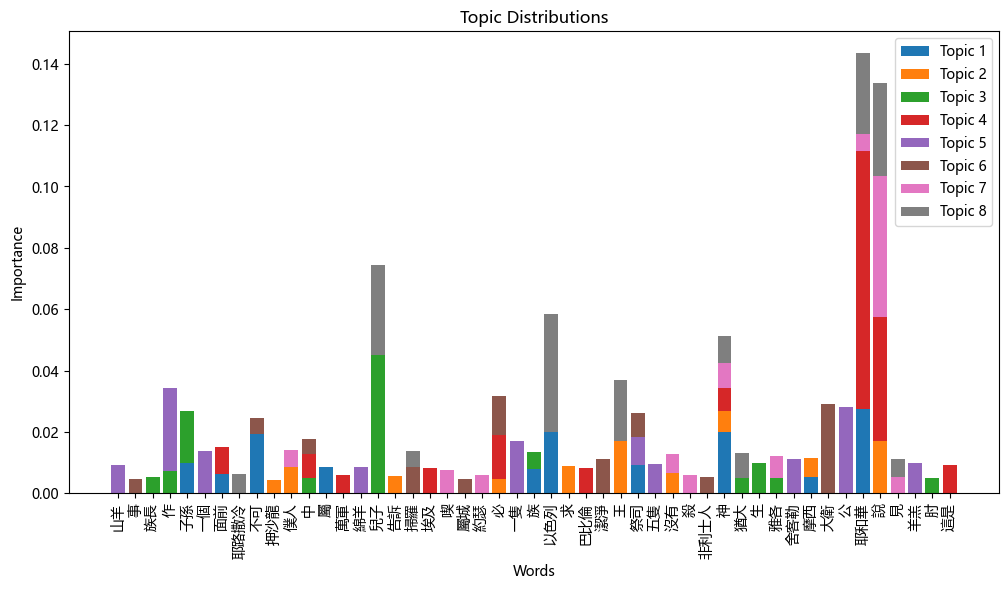


Model Evaluation Scores:
  Coherence: 0.3735815996030116
  Topic diversity: 0.0011550787585658977
  Topic size distribution: 0.0018190086402910413

Finished 'nmf_process' in 19.2882 secs


In [21]:
nmf = tm.nmf_process(bible, num_topics=8, cat=1, chi=True, eval=True, timing=True)

### Save NMF Model

In [22]:
nmf.save("models/nmf_cuv")

NMF model has been saved: 'models/nmf_cuv_model.gensim' and 'models/nmf_cuv_dictionary.gensim'


### Load NMF Model

In [23]:
nmf2 = tm.NMF("", nmf.num_topics)
nmf2.model, nmf2.dictionary = nmf2.load("models/nmf_cuv")
nmf2.show_topics_words()


Topics-Words from NMF Model:
Topic 1:
耶和華 (0.027462)
以色列 (0.019992)
神 (0.019806)
不可 (0.019314)
子孫 (0.009755)
祭司 (0.009297)
屬 (0.008704)
族 (0.007998)
面前 (0.006412)
摩西 (0.005276)

Topic 2:
說 (0.017153)
王 (0.016981)
求 (0.008850)
僕人 (0.008563)
神 (0.007153)
沒有 (0.006523)
摩西 (0.006077)
告訴 (0.005766)
必 (0.004553)
押沙龍 (0.004183)

Topic 3:
兒子 (0.044916)
子孫 (0.017025)
生 (0.009786)
作 (0.007389)
族 (0.005421)
族長 (0.005188)
猶大 (0.005107)
肘 (0.005044)
中 (0.005039)
雅各 (0.005022)

Topic 4:
耶和華 (0.083975)
說 (0.040334)
必 (0.014287)
這是 (0.009315)
面前 (0.008618)
埃及 (0.008372)
巴比倫 (0.008346)
中 (0.007842)
神 (0.007324)
萬軍 (0.006090)

Topic 5:
公 (0.028232)
作 (0.026849)
一隻 (0.016909)
一個 (0.013658)
舍客勒 (0.011246)
羊羔 (0.009878)
五隻 (0.009684)
山羊 (0.009307)
祭司 (0.008978)
綿羊 (0.008664)

Topic 6:
大衛 (0.029207)
必 (0.012725)
潔淨 (0.011259)
掃羅 (0.008411)
祭司 (0.007714)
非利士人 (0.005252)
不可 (0.005143)
事 (0.004717)
中 (0.004636)
屬城 (0.004551)

Topic 7:
說 (0.045880)
神 (0.008102)
喫 (0.007725)
雅各 (0.007050)
沒有 (0.006188)
殺 (0.005